Before starting to create intersections, lets set some directory variables. Depending on the directory settings this will be different for different users. The project folder is where we have the JunctionArt project. In order to visualize the generated intersection we also need a module from esmini. Download esmini and put the directory name in the esminipath variable.  

In [1]:
projectFolder = 'C:/Users/abjawad/Documents/GitHub/junction-art'
esminipath = 'C:/Users/abjawad/Documents/GitHub/esmini'

Next lets put the folder directory to system path so that we dont get any import errors. 

In [2]:
import os, sys
currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass
sys.path.append(str(projectFolder))
os.chdir(projectFolder)
print( f"current working dir{os.getcwd()}")

current working dirC:\Users\abjawad\Documents\GitHub\junction-art


Lets import the necessary modules for creating the intersection. 

In [3]:
import pyodrx
from junctionart.extensions.CountryCodes import CountryCodes
from junctionart.junctions.JunctionBuilderFromPointsAndHeading import JunctionBuilderFromPointsAndHeading 
import junctionart.extensions as extensions

To use the standalone intersection generator 'JunctionBuilderFromPointsAndHeading', lets initialize the builder object using the country code (default country US) and global lane width (default lane width 3 meters). 

In [4]:
intersectionBuilder = JunctionBuilderFromPointsAndHeading(country=CountryCodes.US, laneWidth=3)

To create road intersection using 'JunctionBuilderFromPointsAndHeading', we need to pass in the road definitions to the 'intersectionBuilder' object. Road definition is a list containing at least three roads. Each of the defined road is called the incident roads and are defined as a dictionary. Incidents roads are connected with the intersection at the defined cartesian coordinate and the direction of the road is defined in heading (in radians). Along with this positional parameters, the number of left/right lanes and median type (for adding island) can be defined separately. Possible values for median type are 'partial/None'. Only one end point of the road can have median if the median type is defined as 'partial'. User need to define which endpoint. Lets create three roads for the intersection. 

In [5]:
incidentRoad1 = {'x': -30, 'y': 30, 'heading': 2, 'leftLane': 2, 'rightLane': 2, 'medianType': 'partial', 'skipEndpoint': pyodrx.ContactPoint.start}
incidentRoad2 = {'x':   0, 'y': 30, 'heading': 1,  'leftLane': 2, 'rightLane': 3, 'medianType': None, 'skipEndpoint': None}
incidentRoad3 = {'x':   0, 'y':  0, 'heading': -1.5, 'leftLane': 1, 'rightLane': 1, 'medianType': 'partial', 'skipEndpoint': pyodrx.ContactPoint.end}

Create the road definition list using the three incident roads.

In [6]:
roadDefinition = [ incidentRoad1, incidentRoad2, incidentRoad3]

To create the open drive 

C:/Users/abjawad/Documents/GitHub/esmini\bin\odrplot C:/Users/abjawad/Documents/GitHub/esmini/bin/pythonroad.xodr


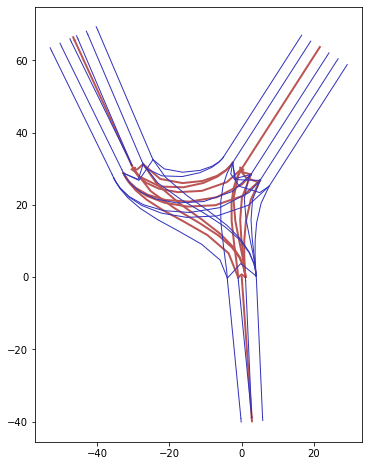

In [7]:
odr = intersectionBuilder.createIntersectionFromPointsWithRoadDefinition(odrID=0, 
                                                                         firstRoadId=100, 
                                                                         roadDefinition=roadDefinition, 
                                                                         straightRoadLen=40, 
                                                                         getAsOdr=True)
extensions.view_road(odr, esminipath)